In [1]:
import torch
import torch.nn.functional as f
import matplotlib.pyplot as plt # for making figures
%matplotlib inline

In [59]:
import pandas as pd

df = pd.read_csv("datasets/train.tsv", sep='\t')
data = df.iloc[:, 1].tolist() 

In [70]:
data[:10]

['9 : 30 am ko Sunday Brunch ke liye ek naya weekly reminder add karen',
 'danny ko message karo aur dekho ke he wants to go to comic con',
 'do ghante ke liye alarm set kardo',
 'neil ke liye cake bake karne ke reminder ko mita den',
 'Please mere chat requests ko retrieve kare',
 'agar mai raat 9 baje tak idhar se nikal jau toh kya mai raat 11 baje tak Taipei pahunch jaunga ?',
 'Pensacola me is weekend ko free me karne ke liye cheeze',
 'Kya aaj thand hone wali hai',
 "Chris ko text karo ki I ' m stuck in traffic",
 'please 50 minutes ke liye timer ko set karen']

In [ ]:
clean = sorted(set(''.join(data)))
# create a mapping from characters to integers
stoi = {s:i for i,s in enumerate(clean)}
itos = {i:s for i,s in enumerate(clean)}
vocab_size = len(clean)

76

In [71]:
clean

[' ',
 '!',
 '&',
 "'",
 '(',
 ')',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '\\',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [2]:
corpus = open("datasets/names.txt").read().splitlines()

In [75]:
clean_hin_dataset = open("datasets\cleaned_hinenglish.txt").read().splitlines()

In [76]:
clean_hin_dataset[:10]

['am ko sunday brunch ke liye ek naya weekly reminder add karen',
 'danny ko message karo aur dekho ke he wants to go to comic con',
 'do ghante ke liye alarm set kardo',
 'neil ke liye cake bake karne ke reminder ko mita den',
 'please mere chat requests ko retrieve kare',
 'agar mai raat  baje tak idhar se nikal jau toh kya mai raat  baje tak taipei pahunch jaunga ',
 'pensacola me is weekend ko free me karne ke liye cheeze',
 'kya aaj thand hone wali hai',
 'chris ko text karo ki i  m stuck in traffic',
 'please  minutes ke liye timer ko set karen']

In [85]:
#building the mappings like tokeniser
clean = sorted(set(''.join(clean_hin_dataset)))
stoi = {s:i for i,s in enumerate(clean)}
stoi['.'] = 27
itos = {i:s for s,i in stoi.items()}

In [86]:
stoi

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 27}

In [114]:
#build the dataset 
block_size = 3
def build_dataset(clean_hin_dataset):
        X,Y = [], []
        context = [27] * block_size
        for word in clean_hin_dataset:
            word = list(word) + ['.']
            for ch1 in word:
                current = stoi[ch1]
                Y.append(current)
                X.append(context)
                #print(''.join(itos[i] for i in context), '--->', itos[current])
                context = context[1:] + [current]
        X = torch.tensor(X)
        Y = torch.tensor(Y)
        return X,Y

import random
random.seed(32)
random.shuffle(clean_hin_dataset)
n1 = int(0.8 * len(clean_hin_dataset))
n2 = int(0.9 * len(clean_hin_dataset))
Xtrain, Ytrain = build_dataset(clean_hin_dataset[:n1])
Xval, Yval = build_dataset(clean_hin_dataset[n1:n2])
Xtest, Ytest = build_dataset(clean_hin_dataset[n2:])

In [90]:
data = build_dataset(clean_hin_dataset[:2])

... ---> a
..a ---> m
.am --->  
am  ---> k
m k ---> o
 ko --->  
ko  ---> s
o s ---> u
 su ---> n
sun ---> d
und ---> a
nda ---> y
day --->  
ay  ---> b
y b ---> r
 br ---> u
bru ---> n
run ---> c
unc ---> h
nch --->  
ch  ---> k
h k ---> e
 ke --->  
ke  ---> l
e l ---> i
 li ---> y
liy ---> e
iye --->  
ye  ---> e
e e ---> k
 ek --->  
ek  ---> n
k n ---> a
 na ---> y
nay ---> a
aya --->  
ya  ---> w
a w ---> e
 we ---> e
wee ---> k
eek ---> l
ekl ---> y
kly --->  
ly  ---> r
y r ---> e
 re ---> m
rem ---> i
emi ---> n
min ---> d
ind ---> e
nde ---> r
der --->  
er  ---> a
r a ---> d
 ad ---> d
add --->  
dd  ---> k
d k ---> a
 ka ---> r
kar ---> e
are ---> n
ren ---> .
en. ---> d
n.d ---> a
.da ---> n
dan ---> n
ann ---> y
nny --->  
ny  ---> k
y k ---> o
 ko --->  
ko  ---> m
o m ---> e
 me ---> s
mes ---> s
ess ---> a
ssa ---> g
sag ---> e
age --->  
ge  ---> k
e k ---> a
 ka ---> r
kar ---> o
aro --->  
ro  ---> a
o a ---> u
 au ---> r
aur --->  
ur  ---> d
r d ---> e
 de ---> k

In [115]:
block_size = 3
embedding_size = 8
batch_size = 32
vocab_size = 28  # 27 characters + 1 for the end of word token
fan_in = embedding_size * block_size
g = torch.Generator().manual_seed(2347243647)
C = torch.randn((vocab_size,embedding_size),generator=g)
w1 = torch.randn((fan_in, 200),generator=g) * 0.01
b1 = torch.randn((200),generator=g) * 0
w2 = torch.randn((200, vocab_size),generator=g) * 0.01
b2 = torch.randn((vocab_size),generator=g) * 0
parameters = [C, w1, b1, w2, b2]

In [121]:
counts = logits.exp()      #logits increase to make counts
prob = counts / counts.sum(-1, keepdims=True) #counts normalized
manual_loss = -prob[torch.arange(413),Y].log().mean() #model product for all correct prob.trans

IndexError: shape mismatch: indexing tensors could not be broadcast together with shapes [413], [228146]

In [116]:
count = 0
for p in parameters:
    count += p.nelement()
count

10852

In [117]:
for p in parameters:
    p.requires_grad = True

In [118]:
steps, lossi = [],[]

In [120]:
for i in range(20000):

  #generate a batch
  idx = torch.randint(0, Xtrain.shape[0], (batch_size,))
  
  #forward pass
  emb = C[Xtrain[idx]]
  hpreact = emb.view(-1,fan_in) @ w1 + b1
  h = torch.tanh(hpreact)
  logits = h @ w2 + b2
  step_loss = f.cross_entropy(logits,Ytrain[idx])

  #backward pass
  for p in parameters:
    p.grad = None
  step_loss.backward()

  #update
  #lr = 0.1 if i < 10000 else 0.01
  lr = 0.001
  steps.append(i)
  lossi.append(step_loss.item())
  for p in parameters:
    p.data += -lr * p.grad
print(step_loss.item())

1.4651820659637451


In [122]:
#loss for val set
with torch.no_grad():
    emb = C[Xval]
    hpreact = emb.view(-1,fan_in) @ w1 + b1
    h = torch.tanh(hpreact)
    logits = h @ w2 + b2
    val_loss = f.cross_entropy(logits,Yval)
print(val_loss.item())

1.5692038536071777


In [123]:
#loss for test set
with torch.no_grad():
    emb = C[Xtest]
    hpreact = emb.view(-1,fan_in) @ w1 + b1
    h = torch.tanh(hpreact)
    logits = h @ w2 + b2
    test_loss = f.cross_entropy(logits,Ytest)
print(test_loss.item())

1.600904941558838


In [108]:
lossi[-10:]

[2.1963486671447754,
 2.3805785179138184,
 2.373546838760376,
 2.1205132007598877,
 2.2721893787384033,
 2.2856380939483643,
 2.1766433715820312,
 2.2990293502807617,
 2.427858829498291,
 2.1538052558898926]

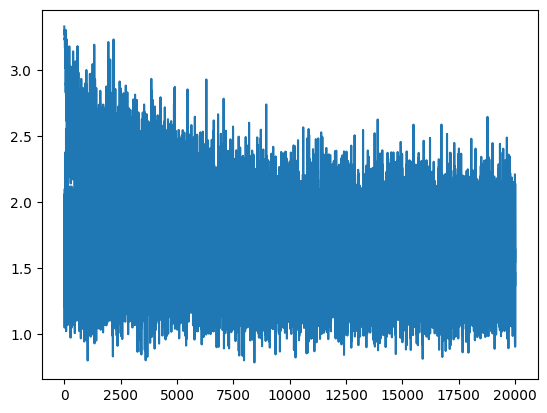

In [124]:
plt.plot(steps, lossi)

In [125]:
# sample from the model
g = torch.Generator().manual_seed(2147447+ 10)

for _ in range(50):
    out = []
    context = [27] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ w1 + b1)
      logits = h @ w2 + b2
      probs = f.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 27:
        break

    print(''.join(itos[i] for i in out))

sveminters set kar  minutes ko ki hai.
boueune ke liye maut reunstago.
mon frast kaisa hai mujhe magle hai timerts fridana to aur mei ado ko piye caf baje deak alarm seshiang aajoons kopi thar hon ko parceo for ke liye.
mondiret karistl ha.
kya ko  petchai.
pbhursik mooc.
mic mounne karo.
mbiye the me bie aj  omj sudlo kitna safsamai is weungosday ek eveninge ke .
plea is raat ka reikuthe remin fnc set kareyi alarm mujhe hur ki warustea hai.
minute foees sekt mujhe kaisa pade rauk alarm ko remin par ko mere ferlerature karo ral raaren.
mujhe umkirrentrami hai .
ay ko me set kare.
midayends hiday goore wauk reminh tak par doctorpown ke lagloacliye baane waus ke liye tathe kag set  bajoyi ke bancerts.
miu hai.
chi dranun.
mujhe diye yaarag timerie kya mai ji kya hai.
mer mest kare.
kya oo messad karning kare.
roon.
poev arcend ko set ke fsoirsijgayy haye timet kitna coak pamiletle  delf aur mujhe mujhe aare kare.
werkexus weatna boek padainamo beather karegi hai.
mai baarabfya aaj gajo  

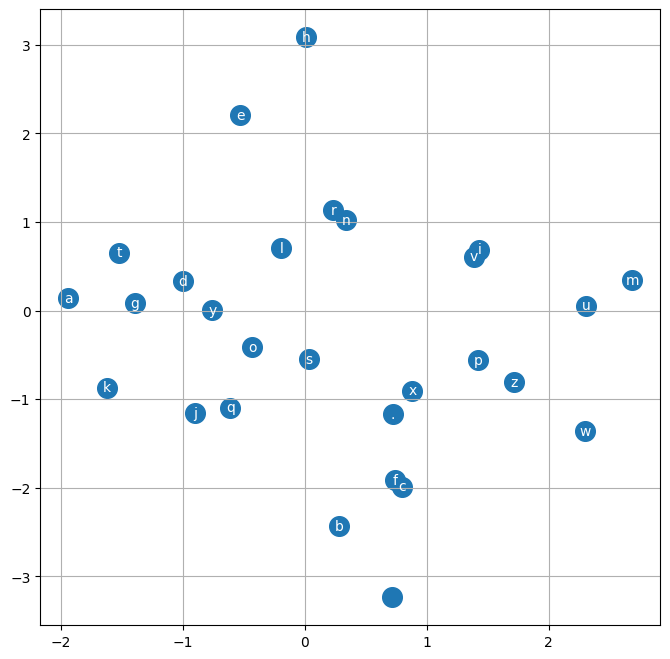

In [126]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')